<a href="https://colab.research.google.com/github/ANUBHAV4646/PRODIGY_GAI_02/blob/main/Prodigyt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter your image prompt: beautiful garden full of flowers


  0%|          | 0/50 [00:00<?, ?it/s]

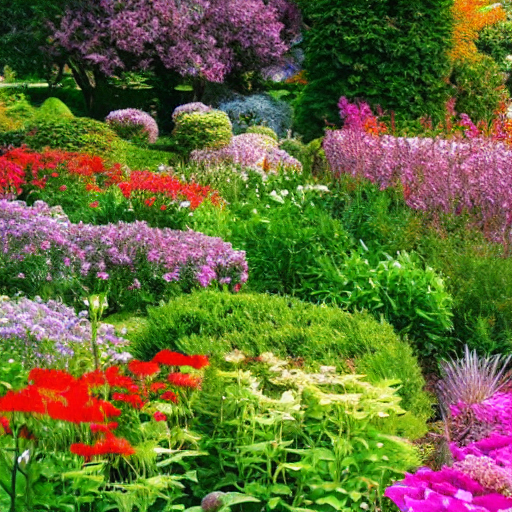

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display
from google.colab import files

def load_pipeline():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")
    model_id = "runwayml/stable-diffusion-v1-5"
    if device == "cuda":
        pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    else:
        pipe = StableDiffusionPipeline.from_pretrained(model_id)
    pipe = pipe.to(device)
    pipe.safety_checker = None
    return pipe

def generate_image(pipe, prompt):
    image = pipe(prompt).images[0]
    return image

pipe = load_pipeline()
prompt = input("Enter your image prompt: ")
image = generate_image(pipe, prompt)
display(image)
image.save("generated_image.png")
files.download("generated_image.png")